In this example, we will implement a simple example of active transport. This particular model is derived from work by Jönsson et al. (2006) describing the transport of auxin. We refer to it as "transport against the gradient" because it assumes that cells are able to sense difference in auxin concentrations relative to their neighbors and relocate their auxin transporters to preferentially pump auxin towards cells of higher concentrations, i.e. the opposite direction of spontaneous diffusion/passive transport. This mechanism was proposed to explain the emergence of lateral organs at the shoot apical meristem.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

# Problem definition

The tissue will be a 10x10 grid of cubic cells. Using larger grids (e.g. 20x20 or 30x30) is possible, but it leads to more complex patterns that are more expensive to simulate. The main issue is that it becomes particularly hard to reach a perfectly steady state.

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(10, 10, 1)

We define one variable called `a`.

In [4]:
sim.register_cell_variable("a")

We then define the differential equation of a. This requires defining some constants and their values.

*D_a* is the diffusion coefficient, and *T_a* is the active transport coefficient.

In [5]:
sim.set_constants({"D_a": 0.03, "T_a": 1.})

In this example, the differential equation uses two built-in functions of the simulation objects: `simulation.diffusion` and `simulation.transport_against_gradient`. These functions automatically compute the net flows due to diffusion and active transport, respectively, for all cells. They also help the Simulation object to integrate the system of differential equations efficiently by contributing to the determination of the structure of the Jacobian matrix, as mentioned in the example about diffusion. They can therefore not be replaced by any user-defined function. User-defined function should be used through the `Simulation._transport` function.

In [6]:
def da_dt(simulation, c_a, D_a, T_a, adjacency_matrix):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) + simulation.transport_against_gradient(T_a, c_a, adjacency_matrix)

sim.set_ODE("a", da_dt)

## Initial conditions

If we started with perfectly uniform concentrations, there would be no differences in concentrations between cells at all, and the system would remain in that unstable steady state. However, cells are not all geometrically identical (the grid is noisy), therefore their volumes are also not identical. As a consequence, we can safely initialize the quantities of matter of `a` to the same value, and concentrations will automatically not be perfectly uniform.

We first need to signal the simulation that all variables have been defined and that arrays can now be reserved for their values.

In [7]:
sim.initialize_cell_variables()

We then define the array of initial quantities of matter of `a`.

In [8]:
a0 = np.ones(sim.n_cells)
sim.set_cell_variable("a", a0)

## Rendering

We register a viewer that will display the concentrations of `a` (`c_a`).

In [9]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 17, "view": (90, -90), "axes": False})

# Visualization of the initial conditions

We can check that the tissue is initially uniform.

<IPython.core.display.Javascript object>


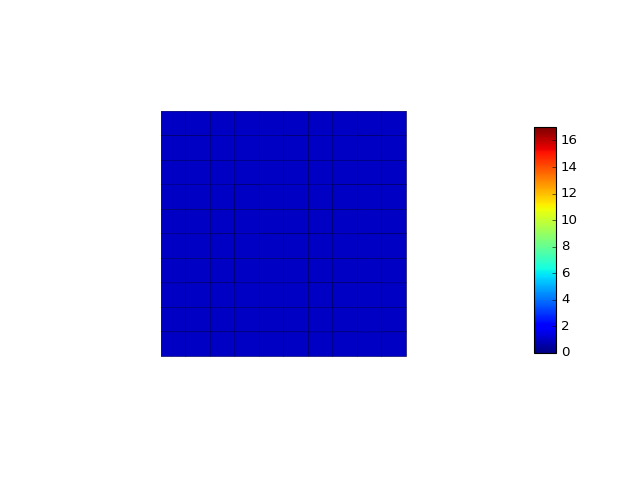

Time point: 0.0
c_a: from 0.99910757067 to 1.00095702546


In [10]:
sim.renderer.display("c_a")

# Simulation

We can then run the simulation to obtain the steady state, however the system goes through several phases before reaching that point.

At the very beginning, local maxima of auxin concentration start forming.

<IPython.core.display.Javascript object>


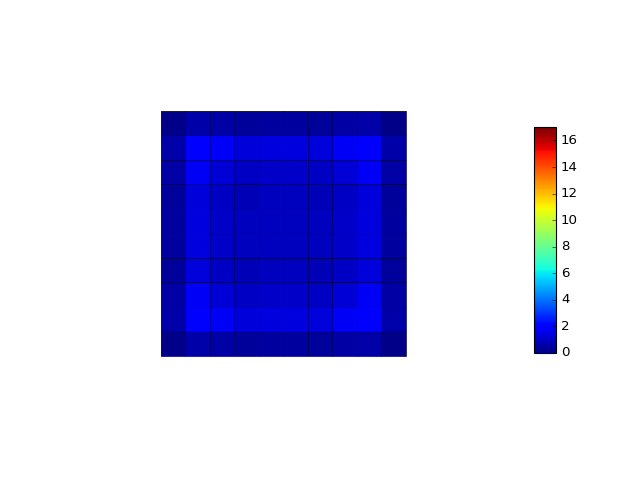

Time point: 5.0
c_a: from 0.192505160167 to 2.10107815671


<IPython.core.display.Javascript object>


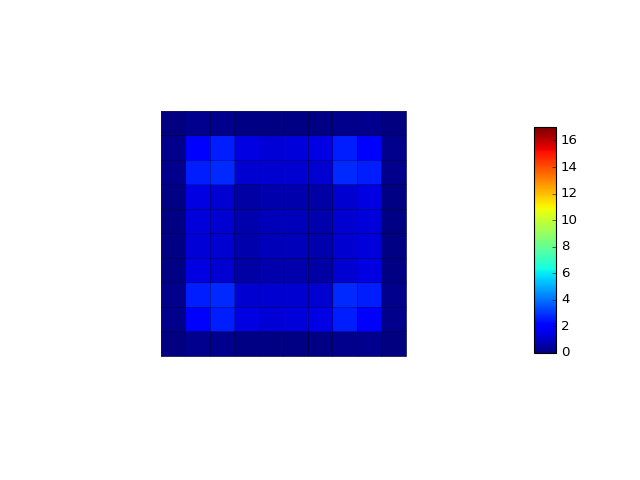

Time point: 10.0
c_a: from 0.0232604874052 to 2.83043026024


<IPython.core.display.Javascript object>


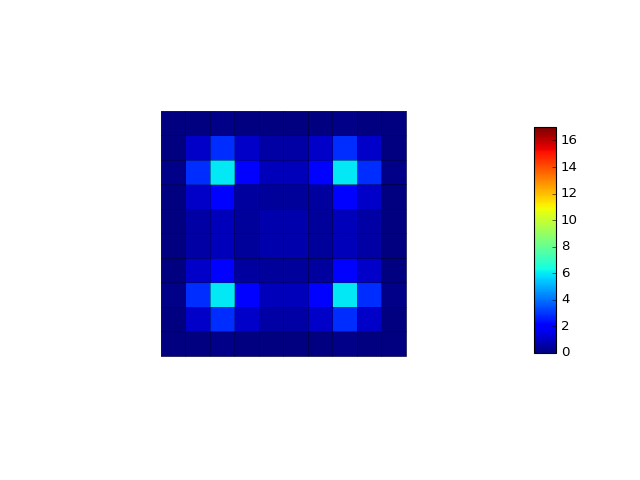

Time point: 15.0
c_a: from 0.00536057194177 to 6.00413146029


<IPython.core.display.Javascript object>


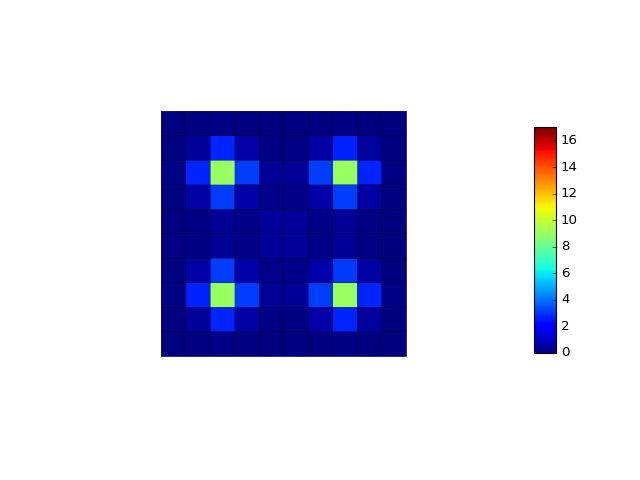

Time point: 20.0
c_a: from 0.0017588958258 to 9.06707613835


In [11]:
sim.set_duration(20)
sim.set_time_steps(4, "linear")
sim.simulate()

Some then get absorbed by their neighbors.

<IPython.core.display.Javascript object>


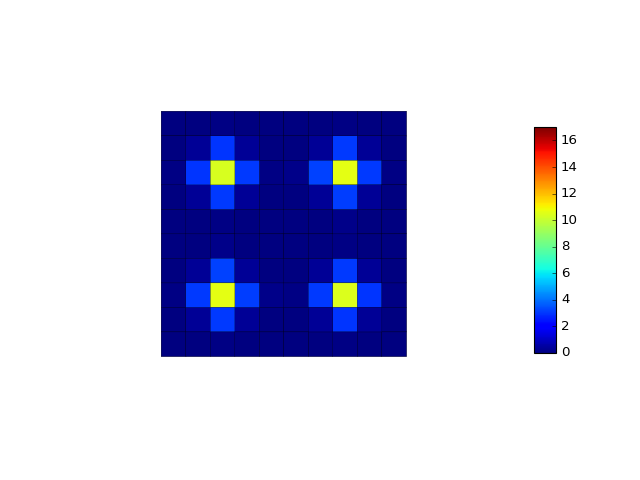

Time point: 15020.0
c_a: from 0.000886175090386 to 10.673297238


<IPython.core.display.Javascript object>


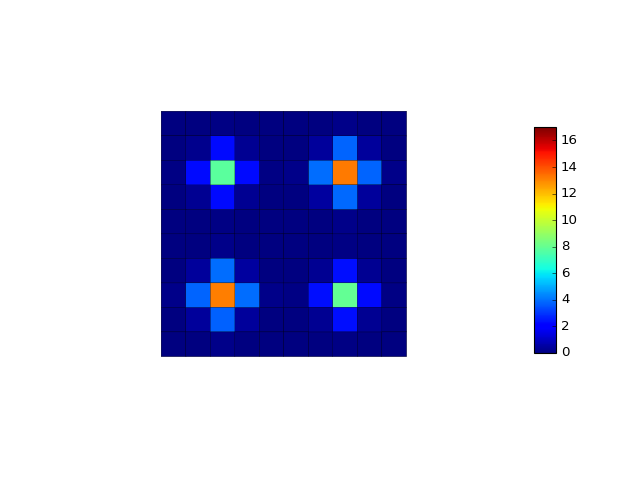

Time point: 30020.0
c_a: from 0.000662329429995 to 13.234115664


<IPython.core.display.Javascript object>


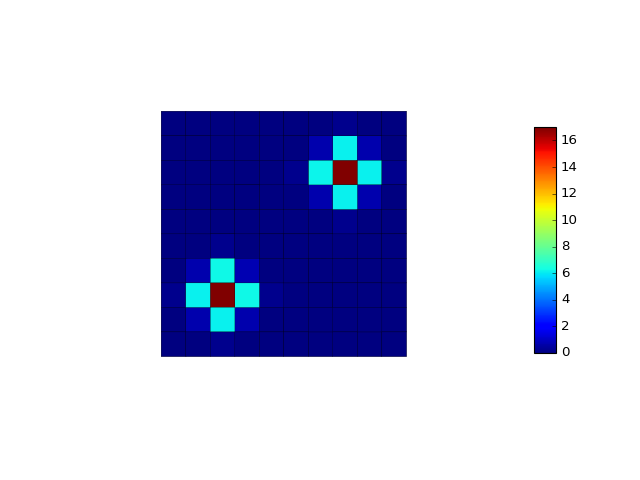

Time point: 45020.0
c_a: from 4.84239499045e-10 to 21.1531974303


In [12]:
sim.set_duration(45000)
sim.set_time_steps(3, "linear")
sim.simulate()

In simulations using larger grids, many more maxima are formed. When two maxima merge, the others shift in space as the pattern evolves towards a stabler state. This contributes to raising the computational cost of a simulations using larger grids.

In this simple case however, the two-maxima pattern appears stable, as it does not change, even after very long simulations.

<IPython.core.display.Javascript object>


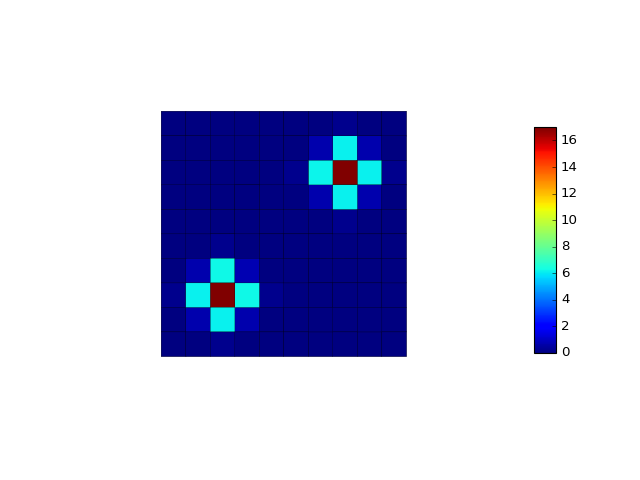

Time point: 100045020.0
c_a: from 4.84240180388e-10 to 21.1588019313


In [13]:
sim.set_duration(1e8)
sim.set_time_steps(1, "linear")
sim.simulate()

We can see the tissue is no longer uniform. Two islets of higher concentrations have appeared. This shows that transport against the gradient can create heterogeneity in a tissue.

The size of the islets is dependent on the $\dfrac{D_a}{T_a}$ ratio. The higher the ratio, the larger the islets (Jönsson 2006).